In [1]:
#!pip install statsmodels

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
from numpy.linalg import matrix_rank, inv
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
def plot_correlation(df, numerical_feature_columns, target, k):
    """_plots correlation_

    Args:
        df (_type_): _data frame_
        numerical_feature_columns (_type_):_series_
        target (_type_): _series_
        k (_type_): _int_ : top 5 columns with respect to target

    Returns:
        _type_: _data fram_
    """
    cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
    cm = df[cols].corr()
    plt.figure(figsize=(10,6))
    return sns.heatmap(cm, annot=True, cmap = 'viridis')

In [4]:
def fit_ols(x, y):
    model = sm.OLS(y, x)
    results = model.fit()
    return results.summary()

In [5]:
def generate_vif(df, target):
    X_var = add_constant(df.loc[:, df.columns != target])
    return pd.Series(
        [variance_inflation_factor(X_var.values, i) for i in range(X_var.shape[1])],
        index=X_var.columns,
    )

In [6]:
def generate_x_y_numeric_target(df, target):
    numerical_feature_columns = list(df._get_numeric_data().columns)
    X = df.loc[:, df.columns != target].values # .values converts column to array
    Y = df.loc[:, df.columns == target].values
    return numerical_feature_columns, X, Y

In [7]:
def check_normal_distribution(df,_column):
    mu=df[_column].mean()
    sd=df[_column].std()
    
    dist_50_range=[mu - sd*(2/3),mu + sd*(2/3)]
    dist_70_range=[mu - sd*(3/3),mu + sd*(3/3)]
    dist_80_range=[mu - sd*(4/3),mu + sd*(4/3)]
    dist_90_range=[mu - sd*(5/3),mu + sd*(5/3)]
    dist_95_range=[mu - sd*(6/3),mu + sd*(6/3)]
    dist_98_range=[mu - sd*(7/3),mu + sd*(8/3)]
    
    dist_50=df[_column].between(dist_50_range[0],dist_50_range[1], inclusive=True).mean()
    dist_70=df[_column].between(dist_70_range[0],dist_70_range[1], inclusive=True).mean()
    dist_80=df[_column].between(dist_80_range[0],dist_80_range[1], inclusive=True).mean()
    dist_90=df[_column].between(dist_90_range[0],dist_90_range[1], inclusive=True).mean()
    dist_95=df[_column].between(dist_95_range[0],dist_95_range[1], inclusive=True).mean()
    dist_98=df[_column].between(dist_98_range[0],dist_98_range[1], inclusive=True).mean()
    
    normal_distribution_results={"50 percent check":dist_50,
                                "70 percent check":dist_70,
                                "80 percent check":dist_80,
                                "90 percent check":dist_90,
                                "95 percent check":dist_95,
                                "98 percent check":dist_98}
    return normal_distribution_results

In [8]:
df = pd.read_csv('G:\My Drive\Artificial intelligence\data sets\data for linear regression base\inp_data.csv')

In [9]:
df

,x1,x2,x3,y
0,100,110,40,3.9
1,95,110,40,2.6
2,90,120,30,2.7
3,85,110,40,3.0
4,80,100,20,2.4
5,75,110,40,2.2
6,70,90,0,2.1
7,65,110,40,2.1
8,60,80,10,1.5
9,55,80,10,1.8


# checking if normal distribution

(array([1., 0., 2., 0., 0., 1., 0., 1., 0., 5.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

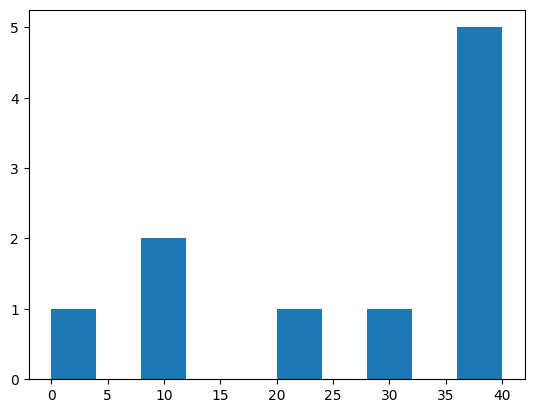

In [10]:
plt.hist(df["x3"])

In [11]:
check_normal_distribution(df,"x3")

C:\Users\IK-LA\AppData\Local\Temp\ipykernel_131800\1926773081.py:12: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dist_50=df[_column].between(dist_50_range[0],dist_50_range[1], inclusive=True).mean()
C:\Users\IK-LA\AppData\Local\Temp\ipykernel_131800\1926773081.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dist_70=df[_column].between(dist_70_range[0],dist_70_range[1], inclusive=True).mean()
C:\Users\IK-LA\AppData\Local\Temp\ipykernel_131800\1926773081.py:14: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dist_80=df[_column].between(dist_80_range[0],dist_80_range[1], inclusive=True).mean()
C:\Users\IK-LA\AppData\Local\Temp\ipykernel_131800\1926773081.py:15: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dist_90=df[_column].between(di

{'50 percent check': 0.2,
 '70 percent check': 0.7,
 '80 percent check': 0.9,
 '90 percent check': 0.9,
 '95 percent check': 1.0,
 '98 percent check': 1.0}

# testing for multicollinearity

- correlation between input features should be low (since, features have to be independent)
- correlation between input features and target has to be high (linear dependency)

<AxesSubplot: >

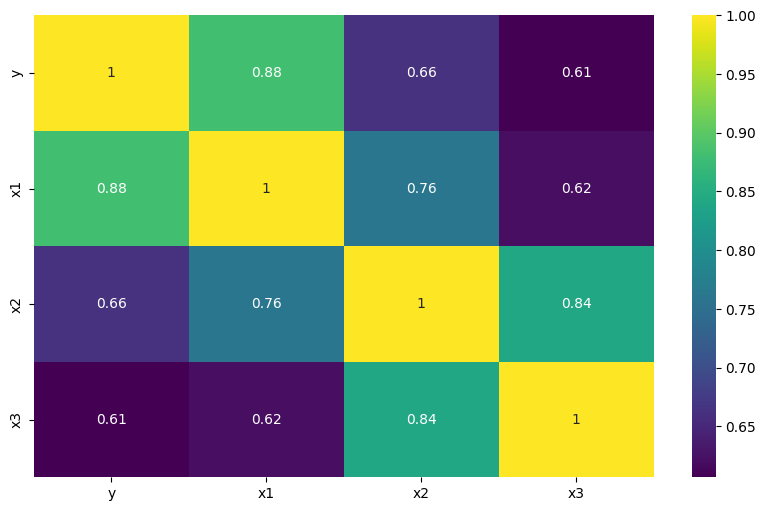

In [12]:
target = 'y'
numeric_cols, X, Y = generate_x_y_numeric_target(df, target)
plot_correlation(df, numeric_cols, target, 5)

**how to detect multicollineaity?**
- correlation between input features should be low (since, features have to be independent)
- correlation between input features and target has to be high (linear dependency)
- sign of co-efficients and and sign of target -feature in corr have to be same. this indicates if there is so amount of colinearity in the data.
- however, if data has horizonatal relationship . r may be 1. but technically its not lienar relationship. hence compute $R^2$.
- good or high $R^2$ value means there is good fit over the data points and there is linear relationship.
- as x changes , y changes, $R^2$ =0.8 means 80 percent of this change in output can be explained by output, reference, is no relationship
- $R^2$ van also be negative , see the formula. can arise due to multicolinerity(i.e. strong influence of certain features may cause it to deviate. think when best fit line is kinda perpendicular to your data points )
- in other words, When predictions are worse than using simple mean, we have R squared to be negative.
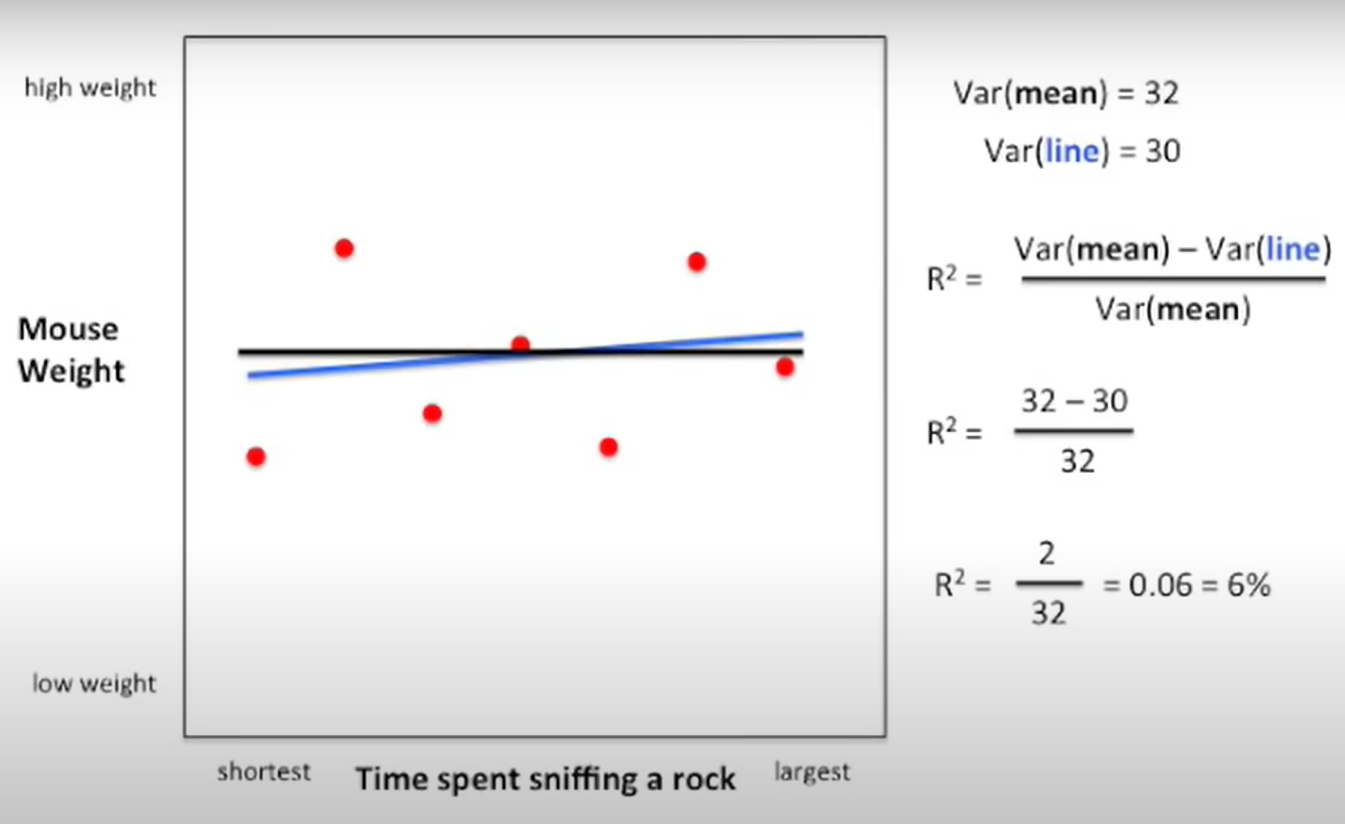

- if adj $R^2$ is much less than $R^2$ then there ia chance that a few features may not be relevant to model. (correlation - causation effect, pizza dugh size vs price of pizza and later adding number of bulbs ).
- run you model with fewer features and gradually increase number of features selectively,if $r^2$ values increases as we increase no of features, than adj r^2 will slighly increase. if adj r^2 decreases then its redundant. see , the formula , its beautifull constructed.

$$A d j u s t e d\,R^{2}=1-\,{\frac{\,(1-\,R^{2})(N-1)\,}{N-\,p-1}}$$
    n is sample size and p is number of independent variables
- t value and p value of t value
    - null hypothesis : feature "k" coeffecient =0 . alternate hypothesis : feature "k" coefficeint not equal to zero. 
    - t value large or greater than 1 and p(t) less than 0.05  -> statistically significant (variables are related) -> reject null hypothesis -> trust your coeeficients 
    null hypothesis.

- F statistic AKA F Test (used when multiple features are present)
    -null hypothesis : whole model and intercept only model (no features)are equal (i.e. perform same). Alternate hypothesis :intercept only model is worse than whole model.
    - F-statistic large or greater >1 and p(f stat) less than 0.05 -> reject null hypothesis->there is a linear relationship between features and target.


  

- VIF value (done only with features(not targets))
    - for data with k features, take one column per iteration as target and all other columns(k-1) are features and calculate $R^2$ value and then calculate VIF. do this for columns. $V I F_{i}=\,\frac{1}{1-R_{i}^{2}}$

    - if VIF >10, heavy multicollinearity (happens when $R^2$ value greater than 0.9 ). it means that the behaviour of that feature can be explained by other feautres(multicollinearity exists)
    - if V-F>5 , significant multicollinearity
    - if VIF <5 ($R^2$ less than 0.8)signifies that there is very little relationship with other features. 
    - advisable to have VIF less than 2.

- Covariance matrix 
    - rank of matrix = number of independependent columns(features).
    - if rank of covariance matrix is less than the number of columns, then there is strong multicollinearity
    - then singular matrix issue arises since, its determinant will be zero. however, error may not show up sometimes, hence we have to be careful. check the derivation below

In [13]:
print(fit_ols(X,Y))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              169.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                    6.72e-07
Time:                        18:28:26   Log-Likelihood:                         -1.9021
No. Observations:                  10   AIC:                                      9.804
Df Residuals:                       7   BIC:                                      10.71
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\IK-LA\anaconda3\envs\venv1\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
print (generate_vif(df, target))

const    135.871560
x1         2.384174
x2         5.027931
x3         3.441157
dtype: float64


In [15]:
covariance_matrix = np.dot(X.T, X)
print (covariance_matrix)

[[ 62125  80500  22250]
 [ 80500 105800  29200]
 [ 22250  29200   9500]]


In [16]:
matrix_rank(covariance_matrix)

3

In [17]:
df['x4'] = df['x1'] + df['x2'] + df['x3']

In [18]:
df.head()

,x1,x2,x3,y,x4
0,100,110,40,3.9,250
1,95,110,40,2.6,245
2,90,120,30,2.7,240
3,85,110,40,3.0,235
4,80,100,20,2.4,200


<AxesSubplot: >

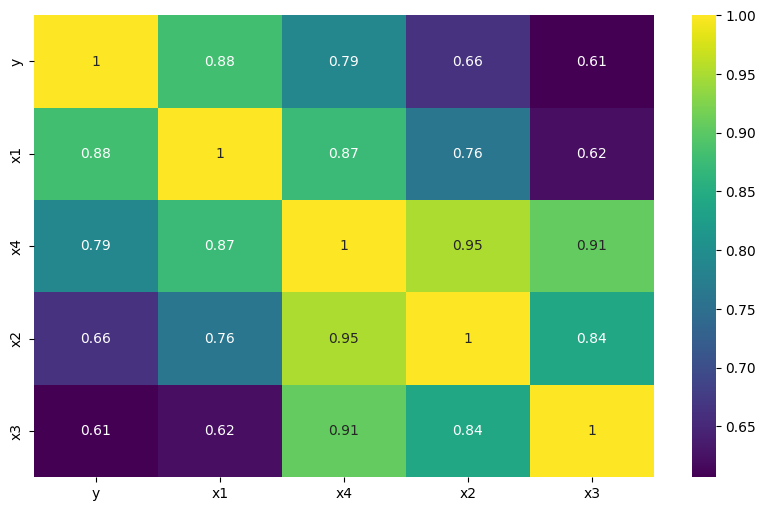

In [19]:
target = 'y'
numeric_cols, X, Y = generate_x_y_numeric_target(df, target)
plot_correlation(df, numeric_cols, target, 5)

In [20]:
print(fit_ols(X,Y))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              169.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                    6.72e-07
Time:                        18:28:27   Log-Likelihood:                         -1.9021
No. Observations:                  10   AIC:                                      9.804
Df Residuals:                       7   BIC:                                      10.71
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\IK-LA\anaconda3\envs\venv1\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [21]:
print (generate_vif(df, target))

const    135.87156
x1             inf
x2             inf
x3             inf
x4             inf
dtype: float64


c:\Users\IK-LA\anaconda3\envs\venv1\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# importance of multicollinearity in lienar and logistic regression

Why does multicollinearity matter in linear and logistic regression but not any decision tree , random forest etc? the asnwer is how these co efficents are calculated

$\beta_{1}=\frac{\sum(x_{i}-{\bar{x}}).(y_{i}-{\bar{y}})}{\sum(x_{i}-{\bar{x}})^{2}}$ or r =${\frac{\Sigma(x_{i}-{\bar{x}}).(y_{i}-{\bar{y}})}{{\sqrt{\Sigma(x_{i}-{\bar{x}})^{2}.\Sigma(y_{i}-{\bar{y}})^{2}}}}}$ and $\beta_{1}=r{\cdot}{\frac{s_{y}}{s_{x}}}$

- for multiple features, you can use below. but for both the formulation is based on  assuming your features are z scores  , 

                        to find weight matrix 
$${{Y}}=X.\beta_{1}.$$
$$X^{T}{{Y}}=X^{T}X\beta_{1}.$$

$$\beta_{1}=(({{X^{T}.X}})^{-1}.X^{T}).{{Y}}$$

$$\beta_{0}=\,\bar{y}-(\beta_{1}.\bar{x})$$


**Note : This method can be used data sets with rows less than 10k . For data sets with larger size , use gradient descent.**

### <center><b>Weights Equation in OLS</b></center>

In [22]:
covariance_matrix = np.dot(X.T, X)
print (covariance_matrix)

[[ 62125  80500  22250 164875]
 [ 80500 105800  29200 215500]
 [ 22250  29200   9500  60950]
 [164875 215500  60950 441325]]


In [23]:
matrix_rank(covariance_matrix)

3

In [24]:
inverse_covariance_matrix = inv(covariance_matrix)

LinAlgError: Singular matrix

In [ ]:
X_sliced = X[:, 0:2]
covariance_matrix = np.dot(X_sliced.T, X_sliced)
print (covariance_matrix)

[[ 62125  80500]
 [ 80500 105800]]


In [ ]:
matrix_rank(covariance_matrix)

2

In [ ]:
inverse_covariance_matrix = inv(covariance_matrix)

In [ ]:
weights = np.dot(np.dot(inverse_covariance_matrix, X_sliced.T), Y)
print (weights)

[[ 0.0408]
 [-0.0071]]


In [ ]:
print(fit_ols(X_sliced,Y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     255.3
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           5.66e-08
Time:                        14:32:17   Log-Likelihood:                -2.5469
No. Observations:                  10   AIC:                             9.094
Df Residuals:                       8   BIC:                             9.699
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0408      0.012      3.458      0.0

# methods to handle multicollinearity
- PCA
- Lasso regression (regularization technique)
- polynomilal expansion